<a href="https://colab.research.google.com/github/Dileepinukurthi/AILobby/blob/main/CIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation, AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

train_datagen=ImageDataGenerator (rescale=1./255,shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator (rescale=1./255)

img_width, img_height =256,256
input_shape=(img_width, img_height,3)
batch_size =16
train_generator =train_datagen.flow_from_directory ("/archive.zip", target_size=(img_width, img_height), batch_size=batch_size)
#valid_generator =test_datagen.flow_from_directory (--valid_dir,target_size=(img_width, img_height), batch_size=batch_size)
#test_generator=test_datagen.flow_from_directory(--test_dir, shuffle=True, target_size=(img_width, img_height), batch_size=batch_size)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(AveragePooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dense(512, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense (128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
model.summary()


SyntaxError: ignored

select
/content/demoleaf.jpeg
43159 51462
severity of disease is 16.134234969492056%
Runtime of the program is 0.17649459838867188 seconds


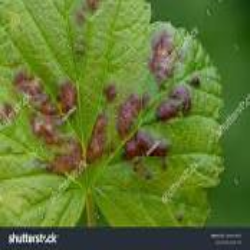

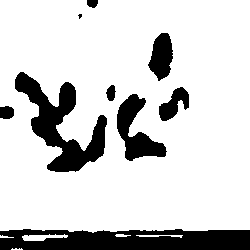

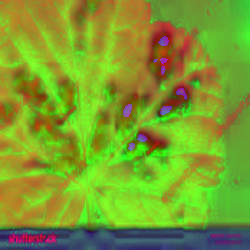

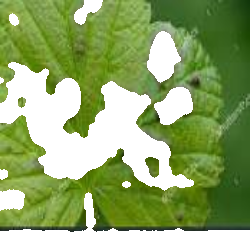

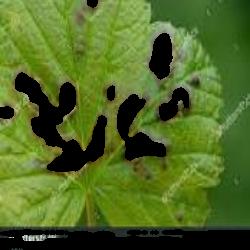

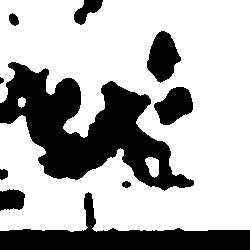

In [1]:
import cv2, time
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import Image

choose_type=input()
if choose_type=="select":
  img_path=input()
elif choose_type=="capture":
    try:
      img_path = take_photo()
      print('Saved to {}'.format(img_path))
      # Show the image which was just taken.
      display(Image(img_path))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))
else:
  print("Choose a Valid Type")
start = time.time()
img = cv2.imread(img_path)
img=cv2.resize(img,(250,250))
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
range1=(26,0,0)
range2=(86,255,255)
mask1=cv2.inRange(hsv,range1,range2)
#applying morphological operations
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask2 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel1)
mask2 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel1)
res=cv2.bitwise_and(img,img,mask=mask2)
range1, range2 = (38,0,0), (86,255,255)
mask = cv2.inRange(hsv,range1,range2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
t=mask
mask = cv2.merge([mask,mask,mask])
mask_inv = 255 - mask
white = np.full_like(img, (255,255,255))
img_masked = cv2.bitwise_and(img, mask)
white_masked = cv2.bitwise_and(white, mask_inv)
result = cv2.add(img_masked, mask_inv)
cv2.imwrite("green_plant_mask.png", t)
cv2.imwrite("green_plant_white_background.jpg", result)
cv2.imwrite("plant_region.jpg", res)
cv2.imwrite("binary.jpg",mask1)
cv2.imwrite("hsv_image.jpg",hsv)
x=cv2.countNonZero(t)
y=cv2.countNonZero(mask2)
print(x,y)
print("severity of disease is {}%".format((1-(x/y))*100))
end = time.time()
print(f"Runtime of the program is {end - start} seconds")
cv2_imshow(img)
cv2_imshow(mask1)
cv2_imshow(hsv)
cv2_imshow(result)
cv2_imshow(res)
cv2_imshow(t)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')